In [1]:
import os
import sys
sys.path.append('/Users/wangqiqian/Desktop/TrafficTDApython/')

current_dir_path = os.getcwd()
current_file_path = os.path.abspath(current_dir_path)
current_dir_path = os.path.dirname(current_file_path)
parent_dir_path = os.path.dirname(current_dir_path)

# os.chdir(current_dir_path + '\\ultils')
os.chdir(current_dir_path + '/ultils')
print(current_dir_path)

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering

from functions import *
from chi import *
from regressionP import *
from models import *
from utils_v3 import *

os.chdir('/Users/wangqiqian/Desktop/TrafficTDApython/')
# os.chdir('C:/Users/USER/Desktop/TrafficTDApython/')

from Version3.tdamapper.core import MapperAlgorithm
from Version3.tdamapper.cover import CubicalCover
from Version3.tdamapper.clustering import FailSafeClustering
from Version3.tdamapper.plot import MapperLayoutInteractive

/Users/wangqiqian/Desktop/TrafficTDApython


In [2]:
with open('/Users/wangqiqian/Desktop/TrafficTDApython/Version3/GridSearch/full_grid_halfdata.pkl', 'rb') as f:
    detailed_results_df = pickle.load(f)

rbind_data = pd.read_csv("./Version3/Data/rbind_data.csv", low_memory=False)

### Note
需要先做標籤再帶入，而不是帶入後標籤，原因在於如果cover內的資料沒有完整屬性，永遠不會標到最後的類別

In [3]:
import seaborn as sns
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r"/System/Library/Fonts/PingFang.ttc")
sns.set(style="whitegrid", font=myfont.get_name())

from matplotlib.cm import get_cmap
from plots import *

In [4]:
rbind_data.columns

Index(['發生年度', '發生日期', '發生時間', '事故類別名稱', '處理單位名稱警局層', '發生地點', '天候名稱', '光線名稱',
       '道路類別-第1當事者-名稱', '速限-第1當事者', '道路型態大類別名稱', '道路型態子類別名稱', '事故位置大類別名稱',
       '事故位置子類別名稱', '路面狀況-路面鋪裝名稱', '路面狀況-路面狀態名稱', '路面狀況-路面缺陷名稱', '道路障礙-障礙物名稱',
       '道路障礙-視距品質名稱', '道路障礙-視距名稱', '號誌-號誌種類名稱', '號誌-號誌動作名稱',
       '車道劃分設施-分向設施大類別名稱', '車道劃分設施-分向設施子類別名稱', '車道劃分設施-分道設施-快車道或一般車道間名稱',
       '車道劃分設施-分道設施-快慢車道間名稱', '車道劃分設施-分道設施-路面邊線名稱', '事故類型及型態大類別名稱',
       '事故類型及型態子類別名稱', '肇因研判大類別名稱-主要', '肇因研判子類別名稱-主要', '當事者順位',
       '當事者區分-類別-大類別名稱-車種', '當事者區分-類別-子類別名稱-車種', '當事者屬-性-別名稱', '當事者事故發生時年齡',
       '保護裝備名稱', '行動電話或電腦或其他相類功能裝置名稱', '當事者行動狀態大類別名稱', '當事者行動狀態子類別名稱',
       '車輛撞擊部位大類別名稱-最初', '車輛撞擊部位子類別名稱-最初', '車輛撞擊部位大類別名稱-其他', '車輛撞擊部位子類別名稱-其他',
       '肇因研判大類別名稱-個別', '肇因研判子類別名稱-個別', '肇事逃逸類別名稱-是否肇逃', '經度', '緯度', '死亡',
       '受傷'],
      dtype='object')

In [ ]:
choose = '道路障礙-視距名稱'
# choose = '死亡'

unique_categories = rbind_data[choose].dropna().unique()
unique_categories.sort()

# 統一顏色
color_palette = get_cmap("tab20", len(unique_categories))
color_mapping_fixed = {category: color_palette(i) for i, category in enumerate(unique_categories)}

mapper_plotter = MapperPlotter(detailed_results_df['mapper_info'].iloc[9][0], 
                               rbind_data, detailed_results_df)
mapper_plotter.create_mapper_plot(choose, most_common_encoded_label, avg=False)
full_info = mapper_plotter.extract_data()
mapper_plotter.map_colors(choose, color_mapping_fixed, size=30)
mapper_plotter.plot(choose, unique_categories, color_palette, 
                    avg=False, set_label=True, size=100)

In [5]:
full_info

,color,node,size,x,y,ids
0,1.33,1,6253,-0.031480,-0.035730,"[0, 239, 321, 376, 379, 381, 427, 428, 434, 61..."
1,1.38,133,2919,-0.022948,-0.058695,"[0, 56, 110, 116, 182, 228, 233, 376, 419, 762..."
2,1.31,371,4930,-0.038875,-0.039415,"[0, 40, 239, 321, 379, 427, 428, 434, 619, 734..."
3,1.65,2,864,-0.070002,-0.156880,"[1, 34, 48, 79, 120, 223, 306, 380, 385, 445, ..."
4,1.71,28,815,-0.091501,-0.204960,"[1, 20, 34, 48, 120, 147, 158, 223, 380, 385, ..."
...,...,...,...,...,...,...
561,0.20,583,5,0.379041,-0.246437,"[107176, 119395, 131151, 139280, 158016]"
562,0.00,543,2,0.347179,0.415734,"[119167, 145149]"
563,0.00,529,1,0.126984,-0.125510,[134054]
564,0.00,568,1,0.417871,0.914985,[141336]


In [ ]:
choose = '當事者行動狀態子類別名稱'
# choose = '死亡'

unique_categories = rbind_data[choose].dropna().unique()
unique_categories.sort()

# 統一顏色
color_palette = get_cmap("tab20", len(unique_categories))
color_mapping_fixed = {category: color_palette(i) for i, category in enumerate(unique_categories)}

mapper_plotter = MapperPlotter(detailed_results_df['mapper_info'].iloc[9][0], 
                               rbind_data, detailed_results_df)
mapper_plotter.create_mapper_plot(choose, most_common_encoded_label, avg=False)
mapper_plotter.extract_data()
mapper_plotter.map_colors(choose, color_mapping_fixed, size=30)
mapper_plotter.plot(choose, unique_categories, color_palette, avg=False, set_label=True, size=100)

In [11]:
mapper_plot1 = MapperLayoutInteractive(
    detailed_results_df['mapper_info'].iloc[9][0],
    # mapper_info[0],
    colors = rbind_data[choose].to_numpy(),
    # colors=data_to_map['事故位置大類別名稱_路段'].to_numpy(),
    cmap = 'jet',
    agg = average_encoded_label,
    # agg = most_common_encoded_label,
    dim = 3,
    iterations = 50,
    seed = 10,
    width = 800,
    height = 800)

# fig_mean1 = mapper_plot1.plot()
# fig_mean1.show(config={'scrollZoom': True})

## Get data info

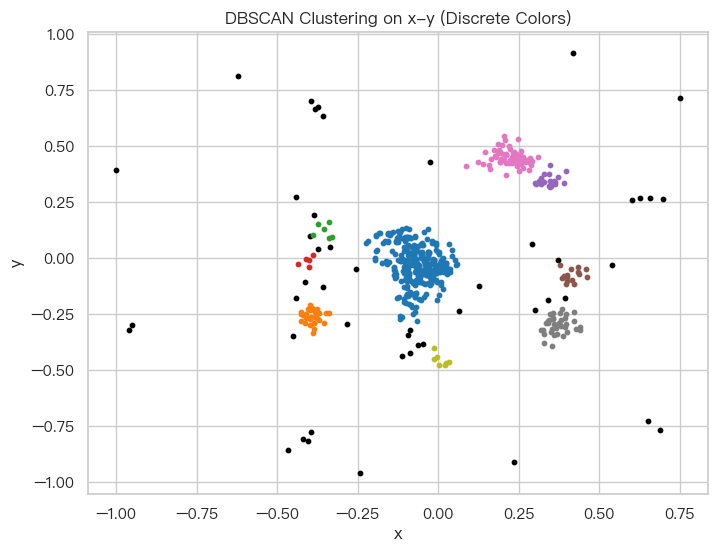

In [27]:
from sklearn.cluster import DBSCAN

X = full_info[['x', 'y']].values
dbscan = DBSCAN(eps=0.049, min_samples=5)

# 執行聚類
clusters = dbscan.fit_predict(X)

# 將聚類結果存入 DataFrame，方便後續作圖
full_info['cluster'] = clusters

unique_clusters = np.unique(full_info['cluster'])
colors = [plt.cm.tab10(i) if i != -1 else (0, 0, 0, 1) for i in unique_clusters]

# 建立顏色字典
color_map = dict(zip(unique_clusters, colors))

plt.figure(figsize=(8, 6))
for cluster, color in color_map.items():
    cluster_points = full_info[full_info['cluster'] == cluster]
    plt.scatter(cluster_points['x'], cluster_points['y'], color=color, label=f"Cluster {cluster}", s=10)

# plt.legend(title="Clusters", loc="upper right")
plt.xlabel('x')
plt.ylabel('y')
plt.title('DBSCAN Clustering on x-y (Discrete Colors)')
plt.show()

In [24]:
# def classify_x_z(row):
#     if row['z'] > 0.05:
#         return 2
#     elif row['x'] > 0.06:
#         return 4
#     elif row['z'] <= 0.05:
#         if row['x'] < -0.03:
#             return 3
#         elif row['z'] > -0.02:
#             return 5
#         else:
#             return 1
#     else:
#         return 1

# df['new_color'] = df.apply(classify_x_z, axis=1) #這是用於自己標色的部分

In [29]:
# # 繪製條形圖
# fig, ax = plt.subplots(figsize=(14, 8))
# width = 0.25
# x = range(len(comparison_df.index))

# # 繪製條形圖
# ax.bar(x, comparison_df[cat], width, label='群 2', color='#5dc6de', edgecolor='black')
# ax.bar([i + width for i in x], comparison_df[cat2], width, label='群 4', color='#ba8c50', edgecolor='black')
# ax.bar([i + 2 * width for i in x], comparison_df['full_5'], width, label='群 5', color='#68bf4b', edgecolor='black')

# # 添加數據標籤
# for i, val in enumerate(comparison_df[cat]):
#     ax.text(i, val + 0.01, f"{val:.3f}", ha='center', fontsize=10, color='black', rotation=45)
# for i, val in enumerate(comparison_df[cat2]):
#     ax.text(i + width, val + 0.01, f"{val:.3f}", ha='center', fontsize=10, color='black', rotation=45)
# for i, val in enumerate(comparison_df['full_5']):
#     ax.text(i + 2 * width, val + 0.01, f"{val:.3f}", ha='center', fontsize=10, color='black', rotation=45)

# # 設置標籤與標題
# ax.set_title(f"類別比照： {category_column}", fontsize=16, fontweight='bold')
# ax.set_ylabel("比例", fontsize=14)
# ax.set_xlabel(category_column, fontsize=14)
# ax.set_xticks([i + width for i in x])
# # ax.set_xticks([i + width / 2 for i in x])
# ax.set_xticklabels(comparison_df.index, rotation=45, ha='right', fontsize=12)
# ax.legend(title="Group", fontsize=12)
# ax.grid(axis='y', linestyle='--', alpha=0.7)

# # 調整圖表布局
# plt.tight_layout()
# plt.show()